In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

$$f(x_1,x_2) = x_1^2+ x_2^2$$

In [2]:
def f(x):
    return x[:,0]**2 + x[:,1]**2

In [3]:
def f1(x,y):
    return x**2+y**2

In [4]:
a = np.array([[1,2],[3,4],[5,6]])

In [5]:
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [6]:
f(a)

array([ 5, 25, 61])

In [7]:
for x,y in a:
    print(f1(x,y))

5
25
61


In [8]:
x = np.random.uniform([-10],[10], size = (1000,2))

In [9]:
x.shape

(1000, 2)

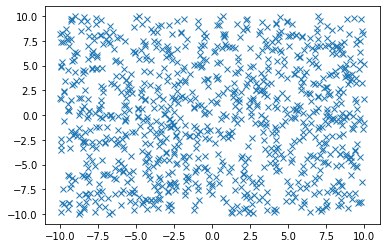

In [10]:
plt.plot(x[:,0],x[:,1],'x')
plt.show()

In [11]:
y = f(x)

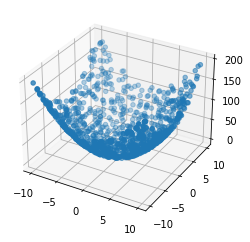

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

In [13]:
W = np.array([[0.1,0.15],[0.21,0.12]])
b  = np.array([0,0])
W_hut = np.array([0.11,0.18])

$$\hat{y} = \hat{W}_1h_1 + \hat{W}_2h_2$$

$$h_1 = \sigma(z_1)$$
$$h_2 = \sigma(z_2)$$

$$z_1 = W_{11}x_1 + W_{12}x_2 + b_1$$
$$z_2 = W_{21}x_1 + W_{22}x_2 +b_2$$

$$\sigma(x) =\frac{1}{1+e^{-x}}$$

In [14]:
def sigma(x):
    return 1/(1+np.exp(-x))

In [15]:
def forward_loop(x_list):
    results = []
    for x in x_list:
        z1 = W[0,0]*x[0]+W[0,1]*x[1]+b[0]
        z2 = W[1,0]*x[0]+W[1,1]*x[1]+b[1]
        h1 = sigma(z1)
        h2 = sigma(z2)
        y_hat = W_hut[0]*h1+W_hut[1]*h2
        results.append(y_hat)
    return results

In [16]:
def forward(x):
    z = W.dot(x.T).T + b
    h = sigma(z).T
    y_hat = W_hut.dot(h)
    return y_hat

In [17]:
y_hat = forward(x)
x.T

array([[ 4.92344883, -2.68398365,  1.68009501, ...,  5.97677863,
        -7.91616168, -8.30389545],
       [ 0.14318971, -9.11822285,  5.50983101, ..., -1.74088548,
         4.69046737, -4.80950252]])

In [18]:
y_hat_test = forward_loop(x)

In [19]:
y_hat[:3]

array([0.20220499, 0.04673892, 0.21238139])

In [20]:
y_hat_test[:3]

[0.20220499155581267, 0.046738924264161805, 0.21238138793738157]

In [21]:
start = datetime.now()

In [22]:
print(datetime.now() - start)

0:00:00.002145


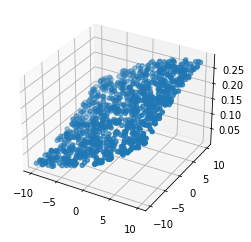

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y_hat)

In [24]:
k = 3
print(x[:k], "\n")
print(W.dot(x.T).T[:k], "\n")
print(W.dot(x[:k].T).T, "\n")


[[ 4.92344883  0.14318971]
 [-2.68398365 -9.11822285]
 [ 1.68009501  5.50983101]] 

[[ 0.51382334  1.05110702]
 [-1.63613179 -1.65782331]
 [ 0.99448415  1.01399967]] 

[[ 0.51382334  1.05110702]
 [-1.63613179 -1.65782331]
 [ 0.99448415  1.01399967]] 



$$\hat{y} = \hat{W}_1h_1 + \hat{W}_2h_2$$

$$h_1 = \sigma(z_1)$$
$$h_2 = \sigma(z_2)$$

$$z_1 = W_{11}x_1 + W_{12}x_2 + b_1$$
$$z_2 = W_{21}x_1 + W_{22}x_2 +b_2$$

$$\sigma(x) =\frac{1}{1+e^{-x}}$$

In [25]:
np.random.seed(0)
x = np.random.uniform([-10],[10], size = (1000,2))
y = f(x)
W1 = np.random.uniform(-0.3, 0.3, size = (2, 2))
W2 = np.random.uniform(-0.3, 0.3, size = (2, 2))
#W1 = np.array([[-0.1,-0.15],[-0.21,-0.12]])
#W2 = np.array([[-0.2,-0.13],[-0.11,-0.32]])

b1 = np.array([0,0])
b2 = np.array([0,0])

W_hut = np.random.uniform(-0.3, 0.3, size = (2,))
b_hut = np.array([0])



In [26]:
def forward(x):
    z1 = W1.dot(x.T).T + b1
    h1 = sigma(z1).T
    z2 = W2.dot(h1).T + b2
    h2 = sigma(z2).T
    y_hat = W_hut.dot(h2).T + b_hut
    
    return y_hat

In [27]:
def update(W1, W2, b1, b2, W_hut, b_hut, x, y, lr): 
    lr /= len(x)
    k = 5
     
    #print(f"x:\n{x[:k]}\n\nb1:\n{b1}\n\nb2:\n{b2}\n\nW1:\n{W1}\n\nW2:\n{W2}\n\nW_hut:\n{W_hut}\n")
    
    z1 = W1.dot(x.T).T + b1
    h1 = sigma(z1).T
    z2 = W2.dot(h1).T + b2
    h2 = sigma(z2).T
    y_hat = W_hut.dot(h2) + b_hut
    
    #print(f"z1:\n{z1[:k]}\n\nz2:\n{z2[:k]}\n\nh1:\n{h1[:k]}\n\nh2:\n{h2[:k]}\n\ny_hat:\n{y_hat[:k]}\n")
    
    W_hut_new = W_hut - lr * 2 * (y_hat - y).dot(h2.T)
    b_hut_new = b_hut - lr * 2 * (y_hat - y).sum()
    
    W2_new = W2 - lr * (((h2 * (1 - h2)).T * W_hut).T * 2 * (y_hat - y)).dot(h1.T)
    b2_new = b2 - lr * ((h2 * (1 - h2)).T * W_hut).T.dot(2 * (y_hat - y))
    
    W1_new = W1 - lr * (((h1 * (1 - h1)).T.dot(W2)).T * ((h2 * (1-h2)).T * W_hut).T * 2 * (y_hat - y)).dot(x)
    b1_new = b1 - lr * (((h1 * (1 - h1)).T.dot(W2)) * (h2 * (1-h2)).T * W_hut).T.dot(2 * (y_hat - y))
    
    
    #print(f"W_hut_new:\n{W_hut_new}\n\nW1_new:\n{W1_new}\n\nW2_new:\n{W2_new}\n\nb1_new:\n{b1_new}\n\nb2_new:\n{b2_new}\n")

    return W1_new, W2_new, b1_new, b2_new, W_hut_new, b_hut_new

print(update(W1, W2, b1, b2, W_hut, b_hut, x, y, 0.1))

print("\nCost: \n", np.sqrt((forward(x) - y) ** 2).mean())

(array([[ 0.18399389, -0.01680064],
       [ 0.01598027, -0.14812377]]), array([[-0.29982563, -0.47215946],
       [-0.04190552, -0.28423685]]), array([-0.01435189,  0.0103257 ]), array([-0.71188709, -0.17318725]), array([6.67396019, 6.66060601]), array([13.94247691]))

Cost: 
 69.7123845570735


In [28]:
start = datetime.now()
for _ in range(500):
    W1, W2, b1, b2, W_hut, b_hut = update(W1, W2, b1, b2, W_hut, b_hut, x, y, 0.1)
    
print(datetime.now() - start)    
#print(f"x:\n{x[:k]}\n\ny:\n{y[:k]}\n\nb:\n{b}\n\nW:\n{W}\n\nW_hut:\n{W_hut}\n")
print(np.sqrt((forward(x) - y) ** 2).mean())

0:00:00.065987
35.52853340074224


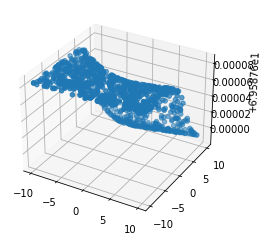

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], forward(x))

In [30]:
z = W.dot(x.T).T + b
h = sigma(z)
print(f"h:\n{h[:5]}\n")

h:
[[0.67769414 0.6729309 ]
 [0.58423335 0.63165557]
 [0.57076964 0.50737347]
 [0.74086964 0.6633193 ]
 [0.64052651 0.84126135]]



In [31]:
x = np.random.uniform([-10],[10], size = (1000,2))
W = np.array([[0.1,0.15],[0.21,0.12]])
b  = np.array([0,0])
W_hut = np.array([0.11,0.18])

In [32]:
"""
n = 1001
lr = 0.05

for i in range(n):
    W, b, W_hut = update(W, b, W_hut, x, y, lr)
    if i % 200 == 0:
        C = np.sqrt(((y - forward(x))**2)).mean()
        print(f"Epoch {i} cost: {C}")
        
print(f"\n\nb:\n{b}\n\nW:\n{W}\n\nW_hut:\n{W_hut}\n")
"""

'\nn = 1001\nlr = 0.05\n\nfor i in range(n):\n    W, b, W_hut = update(W, b, W_hut, x, y, lr)\n    if i % 200 == 0:\n        C = np.sqrt(((y - forward(x))**2)).mean()\n        print(f"Epoch {i} cost: {C}")\n        \nprint(f"\n\nb:\n{b}\n\nW:\n{W}\n\nW_hut:\n{W_hut}\n")\n'

In [33]:
def forward1(x):
    h = x.T
    for i in range(len(W)-1):
        z = W[i].dot(h).T + B[i]
        h = sigma(z).T
    return W[-1].dot(h).T

In [34]:
def update1(W, b, x, y, lr):
    num_x = len(x)
    
    num_layers = len(W)
    #print(num_layers)
    delta_W = [np.zeros(w.shape) for w in W]
    delta_B = [np.zeros(b.shape) for b in B]
    
    # forward
    #z = []
    h = [x.T]
    for i in range(len(W)-1):
        #z.append(W[i].dot(h[-1]).T + B[i])
        z = W[i].dot(h[-1]).T + B[i]
        h.append(sigma(z).T)
    h.append(W[-1].dot(h[-1]).T)
    
    # compute gradients
    db = 2*(h[-1] - y)
    delta_W[-1] = db.T.dot(h[-2].T)
    
    for i in range(2, num_layers+1):
        db = np.dot(db, W[-i+1]) * (h[-i]*(1-h[-i])).T
        delta_B[-i+1] = db.sum(axis=0)
        delta_W[-i] = db.T.dot(h[-i-1].T)
    
    #print(f"delta_W: {delta_W}")
    #print(f"delta_B: {delta_B}")
    # adjust weights and biases
    W_new = [w - lr/num_x * delta_w for w,delta_w in zip(W, delta_W)]
    b_new = [b - lr/num_x * delta_b for b,delta_b in zip(B, delta_B)]
    
    return W_new, b_new
